<center> <h1> FIR Design </h1> </center>

### La idea es encontrar una implementacion que satisfaga la siguiente especificacion con la menor complejidad
![19_1.PNG](19_1.PNG)

### Muestreo en frecuencia 
* Consiste en samplear la respuesta ideal del filtro en frecuencia y luego hacer la IDFT.
* Solo tiene como parametros el numero de muestras.
* Ventajas:
    * Permite una implementacion recursiva.
    * Simplicidad.
* Contras:
    * Solucion suboptima.
![19_2.PNG](19_2.PNG)

In [ ]:
#Declaracion de importaciones y de la funcion para dibujar el zplane
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
import scipy.io as sio
import scipy.fftpack as sc

In [ ]:
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

In [ ]:
def plot_freq_reponse(w,h):
    fig,ax1 = plt.subplots(figsize=(10,6))
    #Magnitud
    ax1.set_title('Digital Filter Frecuency response')
    ax1.plot(w, (20*np.log10(abs(h))), 'b')
    ax1.set_ylabel('Amplitude', color='b')
    ax1.set_xlabel('Frequency [rad/sample]')
    #Fase
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w, angles, 'g')
    ax2.set_ylabel('Angle (radians)', color='g')
    ax1.grid()
    #ax2.grid()
    ax1.axis('tight')
    fig.show()

Text(0.5, 1.0, 'Respuesta al impulso')

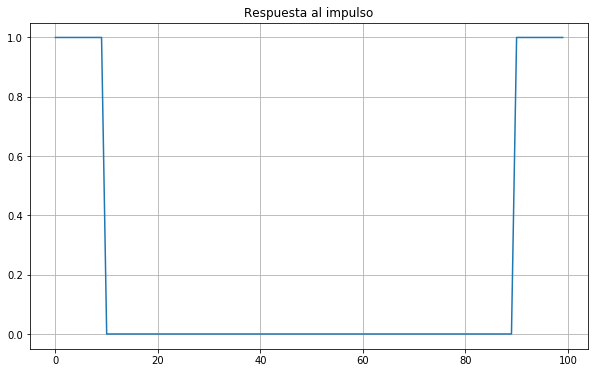

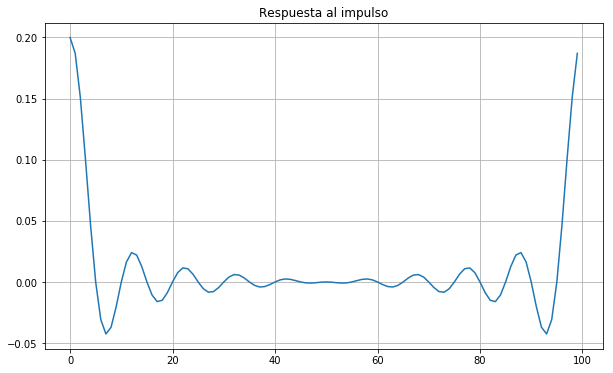

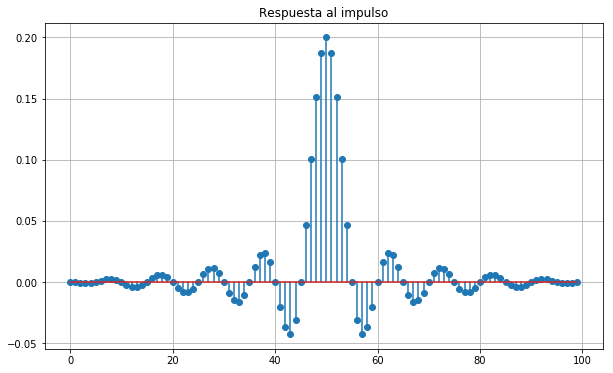

In [ ]:
#Supongamos que queremos hacer un FIR de 100 muestra. Con una frecuencia de corte en 0.1 * fs.
# Por ejemplo para 1 Khz serian 100 Hz.
N = 50    #El orden real sera N*2
f_cut = 0.2 #Normalizada de 0 a fs/2

f_resp = np.hstack((np.ones(np.int(N*f_cut)),np.zeros(np.int(N*(1-f_cut)))))
f_resp = np.hstack((f_resp,f_resp[::-1]))
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(f_resp)
ax.grid()
ax.set_title("Respuesta al impulso")


h_resp = np.fft.ifft(f_resp)
#Recordar que esto nos da algo centrado en cero. Con lo cual hay que hacerlo causal al sistema.

h=np.real(h_resp)
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(h)
ax.grid()
ax.set_title("Respuesta al impulso")


h_shift = np.hstack((h[N:N*2],h[0:N]))
fig,ax = plt.subplots(figsize = (10,6))
ax.stem(h_shift)
ax.grid()
ax.set_title("Respuesta al impulso")



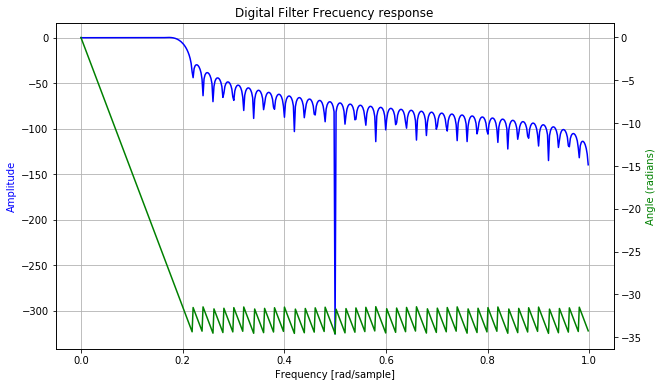

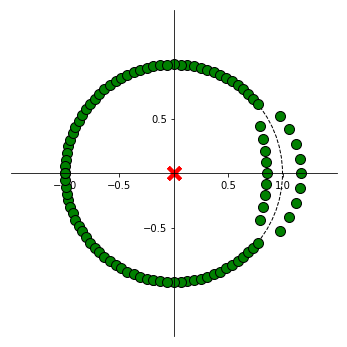

In [ ]:
#Dibujamos la respuesta en frecuencia del filtro
b = h_shift;
a = np.hstack((1,np.zeros(np.size(b)-1)))

#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)

plot_freq_reponse(w / np.pi,h)

fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)

### Metodo de ventaneo
* Definir una respuesta cuadrada como en el caso pasado.
* Ir obteniendo N y w(k) hasta que satisfagamos la plantila.
* Calcular h(k) = hi(k) . w(k) 

Ventajas:
* Simplicidad


Contras:
* Falta de flexibilidad
* Se dificulta espicificar la plantilla
* Solucion sub optima


![19_3.PNG](19_3.PNG)

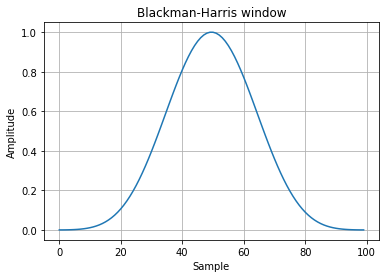

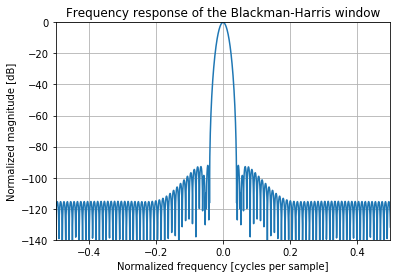

In [ ]:
#  https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.blackmanharris.html#scipy.signal.windows.blackmanharris
window = signal.blackmanharris(100)
plt.plot(window)
plt.title("Blackman-Harris window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.grid()

#Dibujamos el espectro
plt.figure()
A = np.fft.fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(np.fft.fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -140, 0])
plt.title("Frequency response of the Blackman-Harris window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.grid()


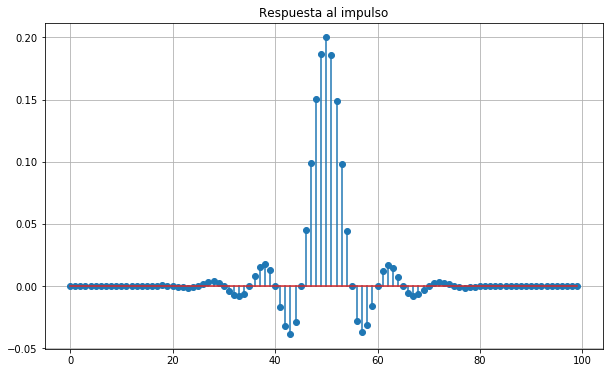

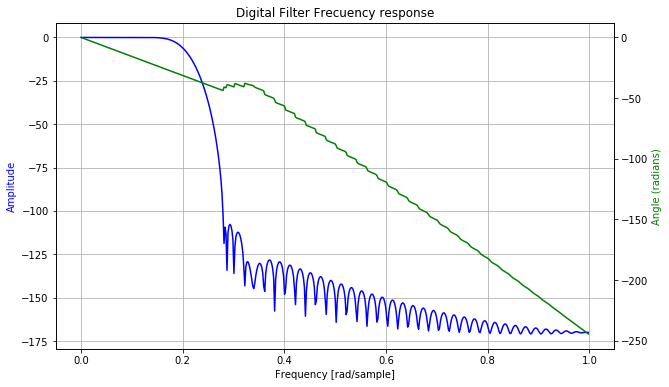

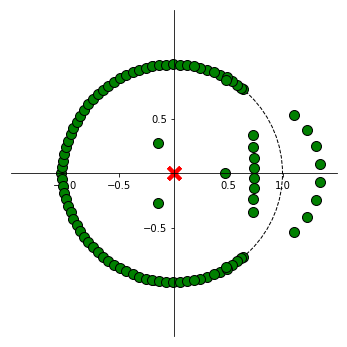

In [ ]:
h = h_shift * signal.blackmanharris(len(h_shift))

b = h;
a = np.hstack((1,np.zeros(np.size(b)-1)))

#Como queda la respuesta
fig,ax = plt.subplots(figsize = (10,6))
ax.stem(h)
ax.grid()
ax.set_title("Respuesta al impulso")


#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)
plot_freq_reponse(w / np.pi,h)
fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)

### Usando FIRWIN2 de PYTHON
* odd numtaps, antisymmetric is False, type I filter is produced
* even numtaps, antisymmetric is False, type II filter is produced
* odd numtaps, antisymmetric is True, type III filter is produced
* even numtaps, antisymmetric is True, type IV filter is produced

Magnitude response of all but type I filters are subjects to following constraints:
* type II – zero at the Nyquist frequency
* type III – zero at zero and Nyquist frequencies
* type IV – zero at zero frequency



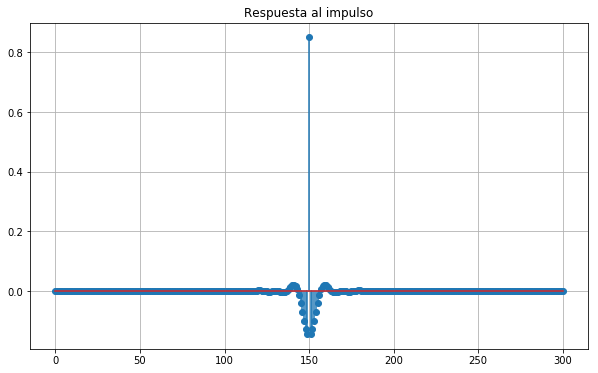

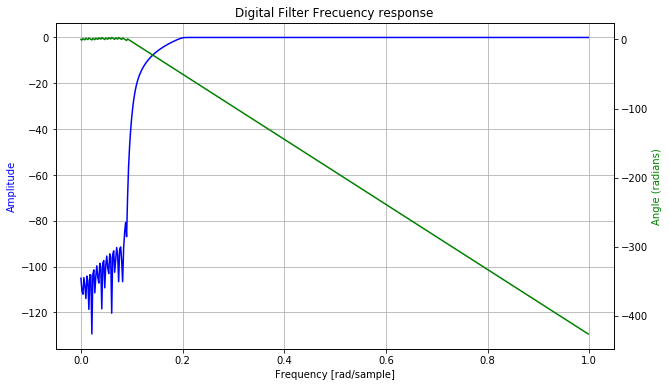

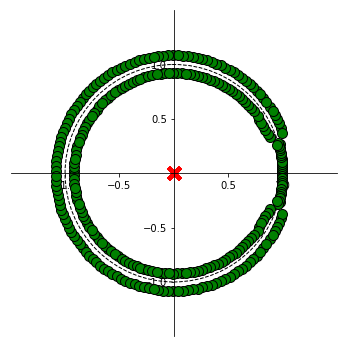

In [ ]:
width = 0.04
beta = 12.0

freq_samples = np.array([0.0, 0.25, 0.5-width, 0.5+width, 0.75, 1.0])

#Podemos usar firwin2 en python para hacer este tipo de filtros
ntaps = 301
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin2.html
#Va de 0 a 1.0 siendo 1.0 la frecuencia de nyquist.

freq = [0.0, 0.1, 0.2, 1.0]
gain = [0.0, 0.0, 1.0, 1.0]


taps = signal.firwin2(ntaps, freq, gain, window='hamming')

b = taps;
a = np.hstack((1,np.zeros(np.size(b)-1)))

#Como queda la respuesta
fig,ax = plt.subplots(figsize = (10,6))
ax.stem(taps)
ax.grid()
ax.set_title("Respuesta al impulso")


#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)
plot_freq_reponse(w / np.pi,h)
fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)


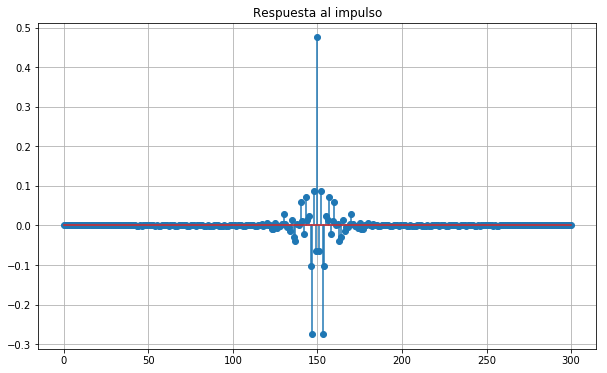

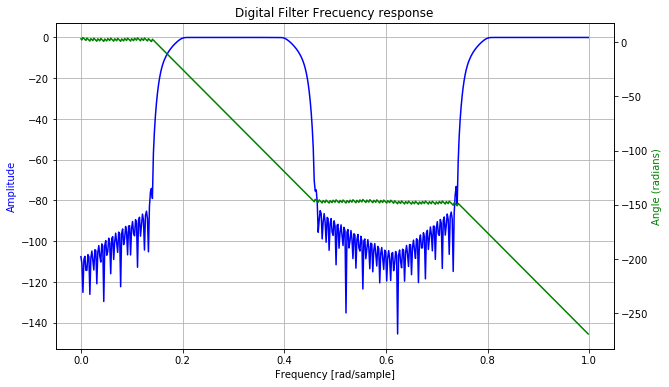

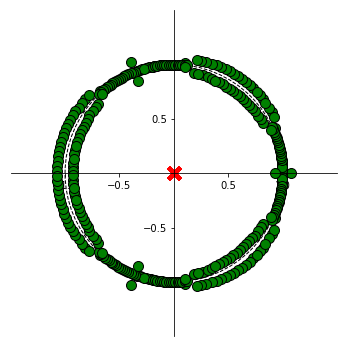

In [ ]:
#Podemos usar firwin2 en python para hacer este tipo de filtros
#Por ejemplo en este caso podemos hacer un multibanda.
ntaps = 301
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin2.html
#Va de 0 a 1.0 siendo 1.0 la frecuencia de nyquist.

freq = [0.0, 0.15, 0.2 , 0.4, 0.45, 0.75, 0.8, 1.0]
gain = [0.0, 0.0, 1.0 , 1.0, 0.0, 0.0, 1.0, 1.0 ]


taps = signal.firwin2(ntaps, freq, gain, window='hamming')

b = taps;
a = np.hstack((1,np.zeros(np.size(b)-1)))

#Como queda la respuesta
fig,ax = plt.subplots(figsize = (10,6))
ax.stem(taps)
ax.grid()
ax.set_title("Respuesta al impulso")


#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)
plot_freq_reponse(w / np.pi,h)
fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)

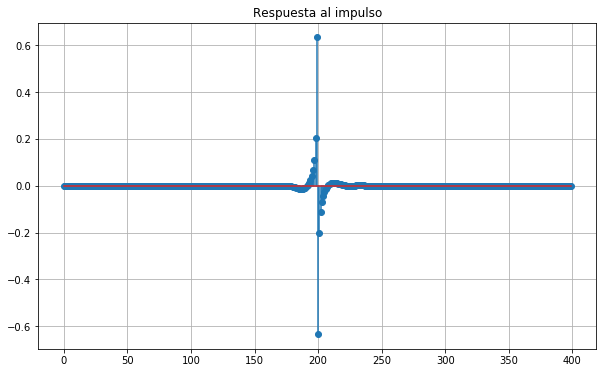

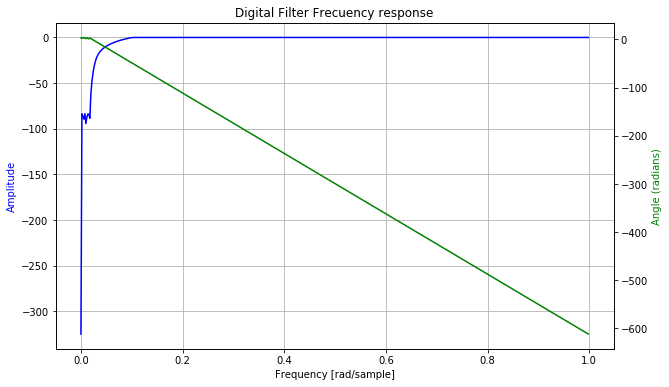

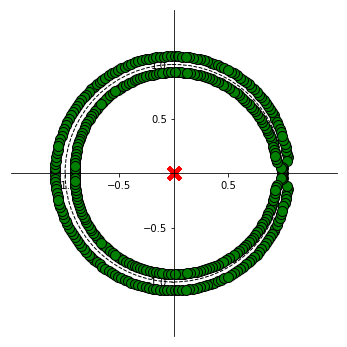

In [ ]:
#Podemos usar firwin2 en python para hacer este tipo de filtros
#Por ejemplo en este caso podemos hacer un multibanda.
ntaps = 400
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin2.html
#Va de 0 a 1.0 siendo 1.0 la frecuencia de nyquist.

freq = [0.0, 0.025, 0.1 ,  1.0]
gain = [0.0, 0.0 , 1.0 ,  1.0]


taps = signal.firwin2(ntaps, freq, gain, window='hamming',antisymmetric = True)

b = taps;
a = np.hstack((1,np.zeros(np.size(b)-1)))

#Como queda la respuesta
fig,ax = plt.subplots(figsize = (10,6))
ax.stem(taps)
ax.grid()
ax.set_title("Respuesta al impulso")


#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)
plot_freq_reponse(w / np.pi,h)
fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)

1000


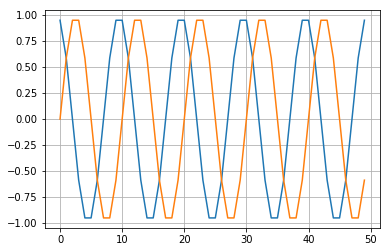

In [ ]:
#Hacemos un senoidal y vemos como su salida esta desfasada 90 grados.
#Vemos que con este filtro tenemos un desfasaje de PI/2 util para comunicaciones. 
fs = 1000.0
f0 = 100.0
t = np.arange(0,1,1/fs)
print(len(t))

x = np.sin(2*np.pi*f0*t)
y =signal.lfilter(b,a,x)

plt.plot(y[500:550],)
plt.plot(x[500:550])
plt.grid()

### Diseño Equiripple
* El criterio de optimización es la minimización del error máximo pro bandas.
* Se obtiene un filtro cuya respuesta en frecuencia oscila uniformemente entre los limite de tolerancia de cada banda.
* El metodo es optimo en el sentido de minimizar el error cuadratico medio en cada banda de interes bajo la restricción de un filtro de orden N.
* Se resuel utilizando los algoritmo:
     * Intercambio de Remez
     * Parks-McCellan

* Tener en cuenta que N es proporcional:
     * Pendiente de la banda de transición.
     * Atenuación en banda de rechazo.
     * Ripple en banda dee paso.
     
* Tener en cuenta que en las freceucnais que no estan especificadas puede haber un overshoot.
 
![19_5.PNG](19_5.PNG)

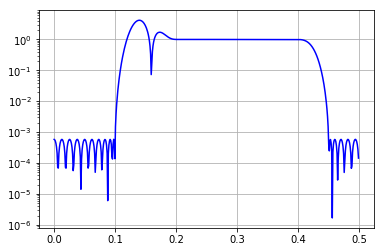

In [ ]:
#Queremos construir un filtro pasabanda de 0.2 a 0.4 Hz de paso. 
# Con bandas de rechazo de 0 a 0.1 Hz y de 0.45 Hz a 0.5Hz,
bpass = signal.remez(72, [0, 0.1, 0.2, 0.4, 0.45, 0.5], [0, 1, 0])
freq, response = signal.freqz(bpass)
ampl = np.abs(response)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.semilogy(freq/(2*np.pi), ampl, 'b-')  # freq in Hz
ax1.grid()
plt.show()



75


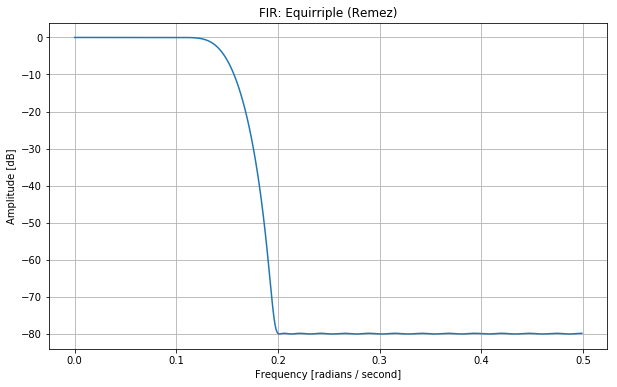

In [ ]:
def conver_db_to_mag(db):
    return np.power(10,db / 20.)

fix,ax = plt.subplots(figsize = (10,6))

frecs = (0,0.1,0.2,0.5)
ntaps = 75
b_fir = signal.remez(ntaps,frecs,(1,conver_db_to_mag(-80.)),Hz = 1.)
w_fir,h_fir = signal.freqz(b_fir)

print(len(b_fir))

ax.plot(w_fir/(np.pi*2),20*np.log10(abs(h_fir)))
ax.set_title('FIR: Equirriple (Remez)')
ax.set_xlabel('Frequency [radians / second]')
ax.set_ylabel('Amplitude [dB]')
ax.grid(which='both', axis='both')
plt.show()

